# X and y Data Creation

X_data: shape (n_windows, samples_per_window, n_components) 

y_precise: exact sample-level earthquake labels

y_condensed: binary labels per window (0=no earthquake, 1=earthquake)

In [1]:
import os
import numpy as np
from obspy import read
from mseed2npy import integrate_preprocessing_and_labeling
import matplotlib.pyplot as plt

Read and merge the stream data (merging is needed for most cases!)

In [2]:
STATION_NAME='rky'
FILE_PATH=f'/home/ege/rawcovar_data/2020-09-21-30_TEST_DATA/mseeds/{STATION_NAME}_210920-300920.mseed'
PROCESSED_OUT_DIR='/home/ege/rawcovar_data/2020-09-21-30_TEST_DATA/processed_data/'

In [3]:
stream = read(FILE_PATH)
stream.merge()

3 Trace(s) in Stream:
KO.RKY..HHE | 2020-09-20T23:59:58.440000Z - 2020-09-30T23:59:59.370000Z | 100.0 Hz, 86400094 samples (masked)
KO.RKY..HHN | 2020-09-20T23:59:58.860000Z - 2020-10-01T00:00:01.110000Z | 100.0 Hz, 86400226 samples (masked)
KO.RKY..HHZ | 2020-09-20T23:59:59.670000Z - 2020-09-30T23:59:59.620000Z | 100.0 Hz, 86399996 samples (masked)

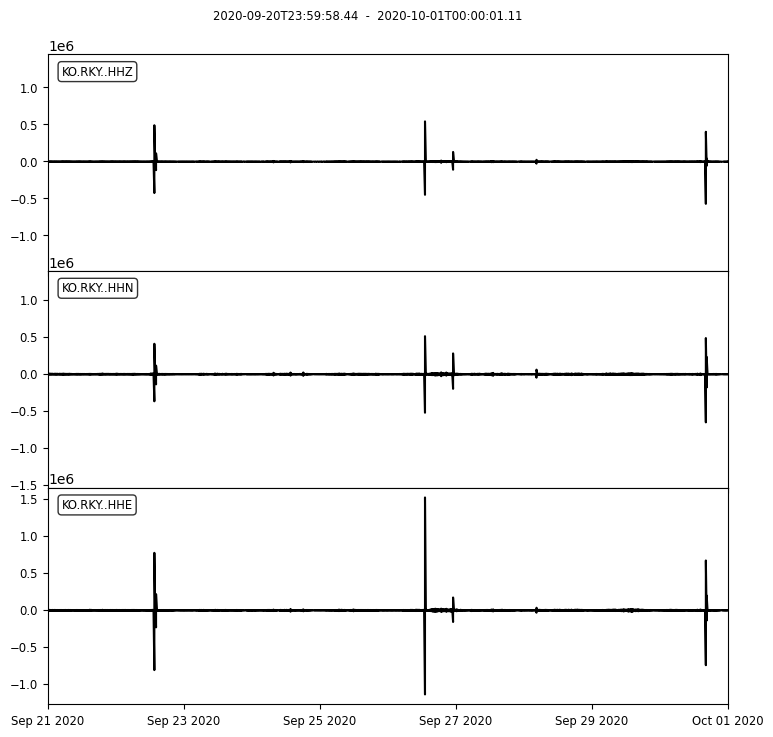

In [4]:
stream.plot();

In [5]:
#Remove additional traces if needed
for tr in stream.select(channel="HN*"):
    stream.remove(tr)  
stream

3 Trace(s) in Stream:
KO.EDC..HHE | 2020-09-20T23:59:59.860000Z - 2020-09-30T23:55:15.990000Z | 100.0 Hz, 86371614 samples (masked)
KO.EDC..HHN | 2020-09-20T23:59:58.040000Z - 2020-09-30T23:55:16.990000Z | 100.0 Hz, 86371896 samples (masked)
KO.EDC..HHZ | 2020-09-20T23:59:57.950000Z - 2020-09-30T23:55:18.990000Z | 100.0 Hz, 86372105 samples (masked)

In [5]:
X_data, y_precise, y_condensed = integrate_preprocessing_and_labeling(stream, 'station_arrivals.csv',output_dir=PROCESSED_OUT_DIR) 
print(f"Processed data shape: {X_data.shape}")
print(f"Windows with earthquakes: {y_condensed.sum()}/{len(y_condensed)}")

Processing 28798 potential windows...
  Found 28615 windows that are good for all traces

Summary:
  Started with 28798 potential windows
  Kept 28615 good windows (99.4%)
  Final shape: (28615, 3000, 3)
  Saved to: /home/ege/rawcovar_data/2020-09-21-30_TEST_DATA/processed_data/KO.RKY.20200920_235959.npy

Label summary:
  Created labels for 28615 windows
  Windows with earthquakes: 32

Final results:
  X shape: (28615, 3000, 3)
  y_precise shape: (28615, 3000)
  y_condensed shape: (28615,)
  Everything is aligned and ready.
Processed data shape: (28615, 3000, 3)
Windows with earthquakes: 32/28615


In [6]:
y_condensed.shape, y_precise.shape, X_data.shape

((28615,), (28615, 3000), (28615, 3000, 3))

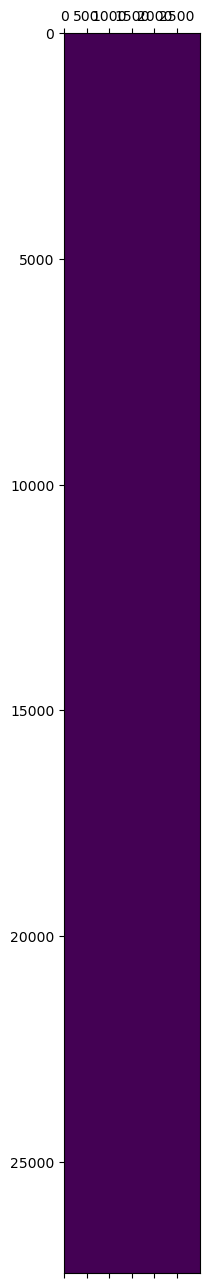

In [9]:
plt.matshow(y_precise)

In [7]:
Y_PRECISE_PATH = PROCESSED_OUT_DIR+f'{STATION_NAME}_y_precise.npy'
Y_CONDENSED_PATH = PROCESSED_OUT_DIR+f'{STATION_NAME}_y_condensed.npy'

np.save(Y_PRECISE_PATH, y_precise)
np.save(Y_CONDENSED_PATH, y_condensed)

### Plot a sample window

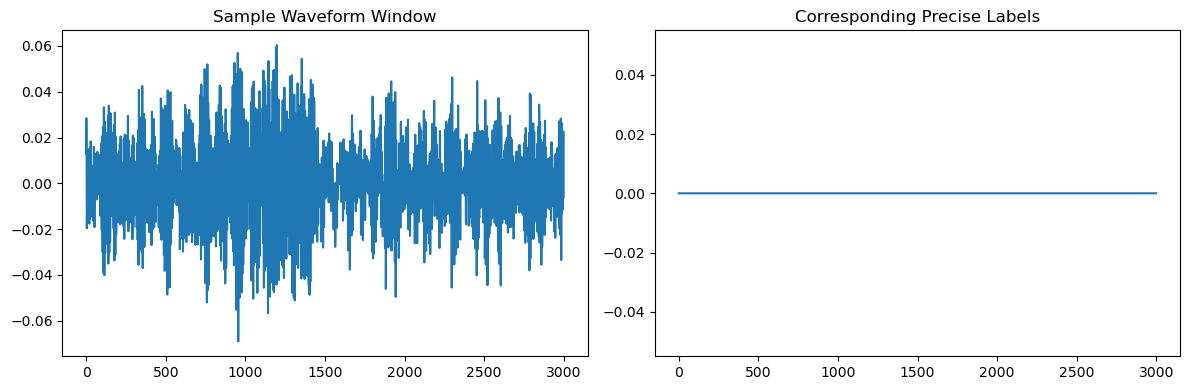

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title("Sample Waveform Window")
plt.plot(X_data[222, :, 0])  # First window, first channel
plt.subplot(122)
plt.title("Corresponding Precise Labels")
plt.plot(y_precise[0])
plt.tight_layout()
plt.show()